Using TensorFlow backend.



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

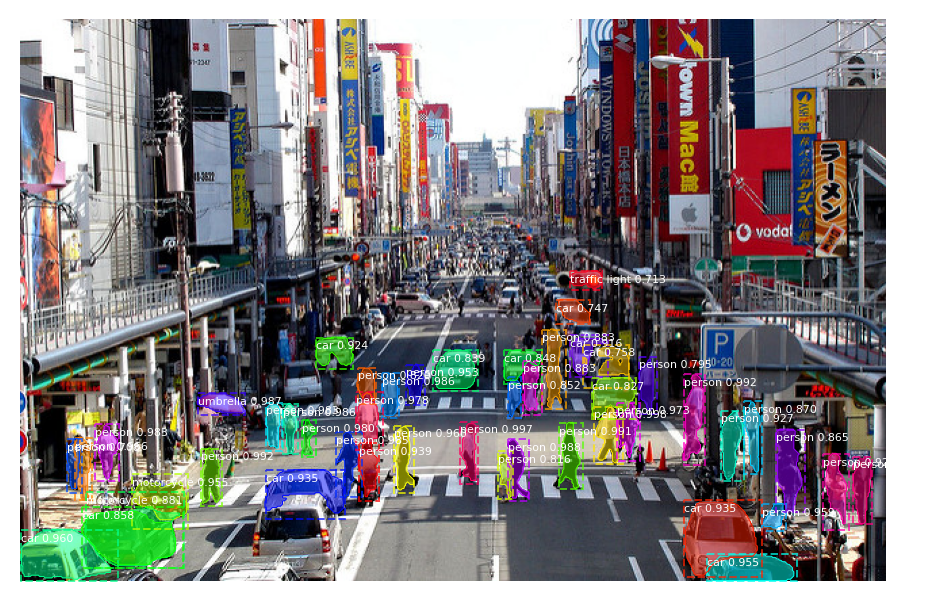

Processing 1 images
image                    shape: (1394, 2492, 4)       min:   10.00000  max:  255.00000  uint8


ValueError: operands could not be broadcast together with shapes (1024,1024,4) (3,) 

In [1]:
import os
from imageio import imread, imwrite

from Mask_RCNN import coco
from Mask_RCNN import model as modellib
from Mask_RCNN import visualize

%matplotlib inline

# Directory to save logs and trained model
MODEL_DIR = "checkpoints"

# Path to trained weights file
# Download this file and place in the root of your
# project (See README file for details)
COCO_WEIGHTS_PATH = "weights/mask_rcnn_coco.h5"

# Directory of images to run detection on
IMAGE_DIR = "images"


# Create configuration
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    PRE_NMS_LIMIT = 6000


if __name__ == "__main__":
    # Initialize config
    config = InferenceConfig()
    config.display()

    # Create model object in inference mode.
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

    # Load weights trained on MS-COCO
    model.load_weights(COCO_WEIGHTS_PATH, by_name=True)

    # COCO Class names
    # Index of the class in the list is its ID. For example, to get ID of
    # the teddy bear class, use: class_names.index('teddy bear')
    class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
                   'bus', 'train', 'truck', 'boat', 'traffic light',
                   'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
                   'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
                   'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
                   'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
                   'kite', 'baseball bat', 'baseball glove', 'skateboard',
                   'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
                   'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
                   'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                   'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
                   'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
                   'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
                   'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
                   'teddy bear', 'hair drier', 'toothbrush']

    files = os.listdir(IMAGE_DIR)
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            image = imread(os.path.join(IMAGE_DIR, file))

            # Run detection
            results = model.detect([image], verbose=1)

            # Visualize results
            # Visualize results
            r = results[0]
            visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                                        class_names, r['scores'])